# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aspng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aspng\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1920'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['KB_JB838_1920-01-13_01-00005.txt',
 'KB_JB838_1920-01-18_01-00014.txt',
 'KB_JB838_1920-02-04_01-00001.txt',
 'KB_JB838_1920-02-04_01-00002.txt',
 'KB_JB838_1920-02-06_01-00004.txt']

In [7]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'LE SOIR « Lm Miniafci» Wnrt Itft mmm aoi|aét (|M W TêtoaMHit qu’il* >f<ww>p*‘ jnrntUi chaud** éekw* p**, U* foulard* élégant*, 1* boaiMtori* ooafovUU* d* BOULANGER afrnUmk à la perfection d* la te*»»e. CD. BOULANGER & FUS MAITRES-CHEMISIERS 70, Rie du Lombard, BRUXELLES Tél. : B. 121.32 VA L. EN TA . tiïa. usage constant dans B Ha HOPITAUX ANGLAIS D U BARRV, Bf ION DRES « Hue Duret, 8, Péris, le 1'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
tfidf_vectors = vectorizer.fit_transform(texts)

C:\Users\aspng\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 811417 stored elements and shape (1000, 3982)>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

louer     0.554273
ami       0.123930
jardin    0.120791
env       0.119130
étage     0.108724
            ...   
ailes     0.000000
îo        0.000000
îr        0.000000
'■        0.000000
.3        0.000000
Length: 3982, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [15]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [16]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.8926619422735202)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1920-01-18_01-00014.txt',
               'KB_JB838_1920-02-06_01-00004.txt',
               'KB_JB838_1920-03-11_01-00004.txt',
               'KB_JB838_1920-03-19_01-00003.txt',
               'KB_JB838_1920-03-19_01-00004.txt',
               'KB_JB838_1920-03-23_01-00004.txt',
               'KB_JB838_1920-03-29_01-00003.txt',
               'KB_JB838_1920-04-19_01-00003.txt',
               'KB_JB838_1920-04-23_01-00004.txt',
               'KB_JB838_1920-05-14_01-00004.txt',
               'KB_JB838_1920-05-17_01-00003.txt',
               'KB_JB838_1920-05-26_01-00004.txt',
               'KB_JB838_1920-05-30_01-00003.txt',
               'KB_JB838_1920-05-30_01-00008.txt',
               'KB_JB838_1920-06-09_01-00004.txt',
               'KB_JB838_1920-06-24_01-00004.txt',
               'KB_JB838_1920-06-27_01-00003.txt',
               'KB_JB838_1920-06-29_01-00004.txt',
               'KB_JB838_1920-07-15_01-00006.txt',
               'KB_JB838_1920-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[ 0.18320694, -0.24440517],
       [-0.10203273, -0.02854452],
       [-0.31081116,  0.19115844],
       [-0.31197683,  0.17964745],
       [-0.17986557, -0.03288066],
       [ 0.61165772,  0.36934974],
       [ 0.12138147, -0.36993699],
       [-0.11887868, -0.1552884 ],
       [-0.29834906,  0.16660672],
       [ 0.0246944 , -0.25078618]])

### Générer le plot

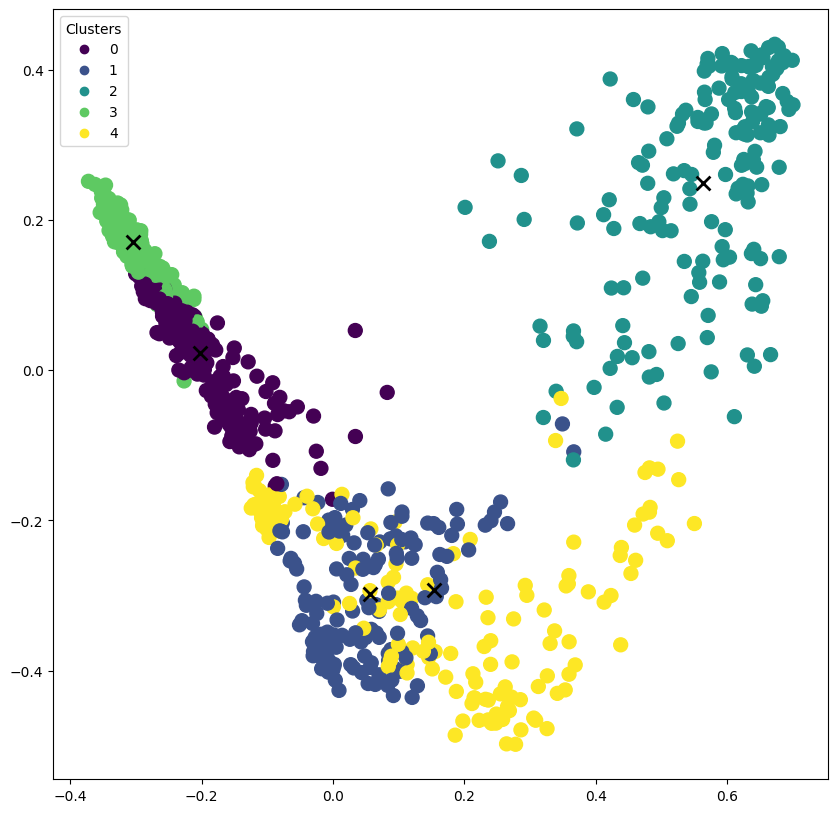

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")